# FTE/BTE Experiment for Aircraft & Birdsnap

---

This experiment investigates the ability of progressive learning on tranferring knowledge across different datasets. Two datasets, the [FGVC-Aircraft-2013b](https://www.robots.ox.ac.uk/~vgg/data/fgvc-aircraft/), an image dataset of aircrafts, and [Birdsnap](http://thomasberg.org/), an image dataset of birds, have been used. The information of the datasets has been listed below.

| Dataset       |# images   | # labels  |  # images per label (minimum)  |
| --------------- |:-----------------:| :-------:|---------------------------:|
| fgvc-aircraft-2013b | 10000 | 100 | 100 |
| birdSnap    | 49829 | 500 | 69 (100 for most species)  |

Before the experiment, we uniform the images by padding them into squares and then by resizing them to $32\times32$ (pixels). The code for dataset preprocessing and the resized images can be found [here](https://github.com/chenyugoal/Dataset_Preprocessing). 

Considering the difference between the two datasets in the number of images, we choose a proportion of each dataset to use so that the number of classes and the number of images per class are equal.

In [1]:
import numpy as np
from joblib import Parallel, delayed

### Load tasks

The processed dataset can be downloaded [here](https://github.com/chenyugoal/Dataset_Preprocessing). 

After running the blocks of code below, we will get the splitted tasks. We have 10 tasks in total, with first 5 set up from Aircraft and the last 5 set up from Birdsnap. Each task has 20 labels to classify. For each label, there are 90 samples.

Therefore, the total number of samples is:

 $10\times20\times90=18000$

In [2]:
path_aircraft_x_all = 'F:/Programming/Python/NDD/Dataset_Preprocessing/data/aircraft_x_all.npy'
path_aircraft_y_all = 'F:/Programming/Python/NDD/Dataset_Preprocessing/data/aircraft_y_all.npy'

path_birdsnap_x_all = 'F:/Programming/Python/NDD/Dataset_Preprocessing/data/birdsnap_x_all.npy'
path_birdsnap_y_all = 'F:/Programming/Python/NDD/Dataset_Preprocessing/data/birdsnap_y_all.npy'

In [3]:
from functions.fte_bte_aircraft_bird_functions import load_tasks

train_x_task, test_x_task, train_y_task, test_y_task = load_tasks(path_aircraft_x_all,
                                                                  path_aircraft_y_all,
                                                                  path_birdsnap_x_all,
                                                                  path_birdsnap_y_all)

### Sample images

Let's take a look at images from Aircraft and Birdsnap by running the block below.

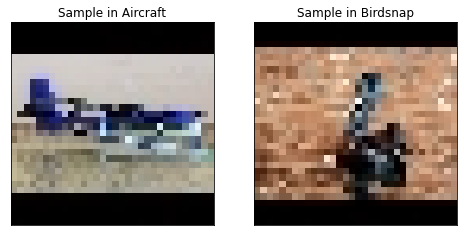

In [4]:
from functions.fte_bte_aircraft_bird_functions import show_image

show_image(train_x_task)

### Run progressive learning

Here we provide two options of implementations of progressive learning: 

- omnidirectional forest (Odif), which uses uncertainty forests  as the base representer
- omnidirectional networks (Odin), which uses a deep network as the base representer.

Use `odif` for omnidirectional forest and `odin` for omnidirectional networks.

In [5]:
from functions.fte_bte_aircraft_bird_functions import single_experiment

model = 'odif'        # Choose 'odif' or 'odin'
ntrees = 10           # Number of trees
num_repetition = 30

accuracy_list = Parallel(n_jobs=6)(delayed(single_experiment)(train_x_task,test_x_task,train_y_task,test_y_task,ntrees,model) for _ in range(num_repetition))

accuracy_all_avg = np.average(accuracy_list, axis = 0)

### Calculate and plot transfer efficiency

In [6]:
from functions.fte_bte_aircraft_bird_functions import calculate_results

err, bte, fte, te = calculate_results(accuracy_all_avg)

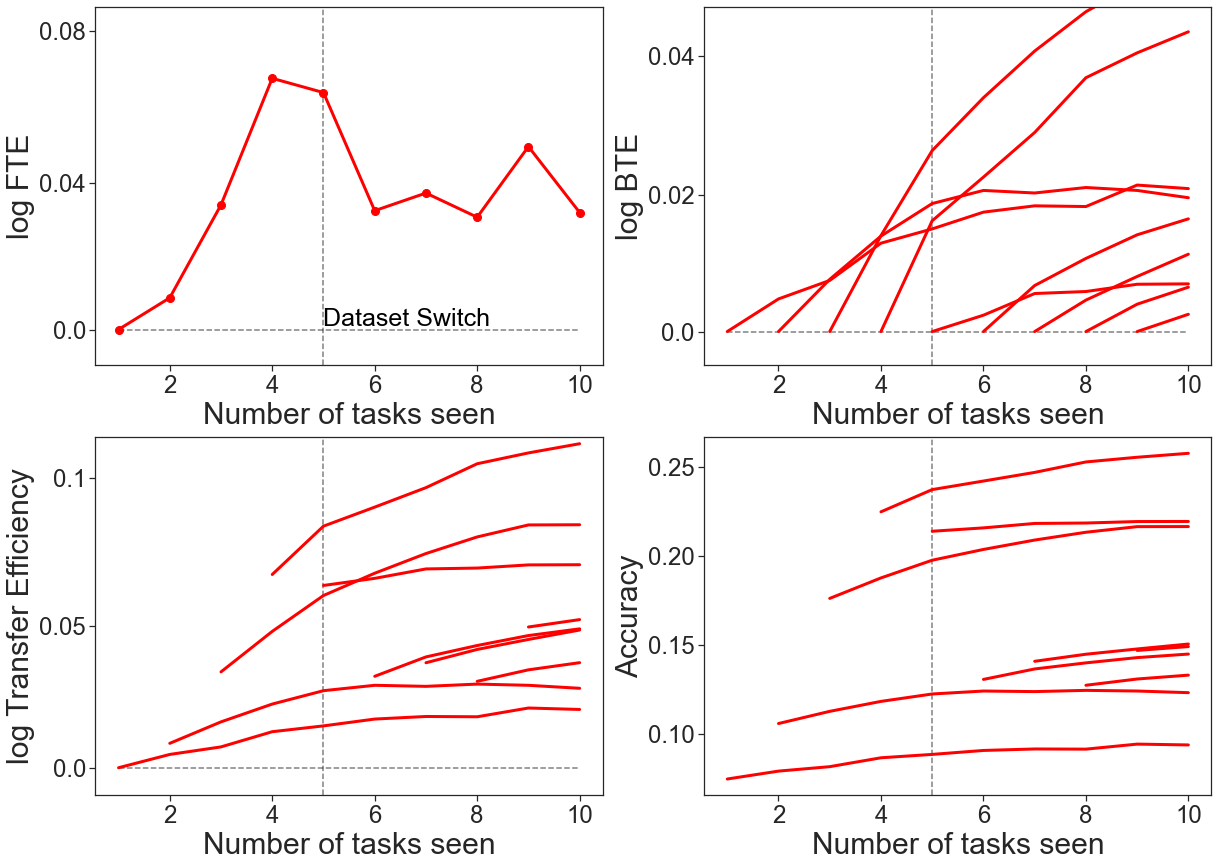

In [7]:
from functions.fte_bte_aircraft_bird_functions import plot_all

plot_all(err, bte, fte, te)